# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| FELIPE FIRMINO DE OLIVEIRA             | RM 338432      | `15IA` |
| DIEGO MATSUKI             | RM 338425      | `15IA` |
| RAFAEL ALVES SANTOS LUNARDELLI             | RM 337637      | `15IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**:Foram utilizadas 1000 imagens de cada classe

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [2]:
## IMPLEMENTE
divisao_treino_validacao = 0.30

In [3]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 2100 images belonging to 3 classes.


In [4]:
val_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 900 images belonging to 3 classes.


In [5]:
train_generator.class_indices, val_generator.class_indices

({'bacteria': 0, 'controle': 1, 'viral': 2},
 {'bacteria': 0, 'controle': 1, 'viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [6]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:
A ResNet50 é uma rede residual com 50 camadas. O avanço na arquitetura da ResNet nos permite treinar redes neurais extremamente profundas, com mais de 150 camadas. A arquitetura da ResNet50 possui duas características principais: 

- “Identity shortcut connections”: uma estratégia de “atalhos” ou “conexões de salto”, que pulam pares de grupos de camadas convolucionais. São também chamadas gated units ou gated recurrent units, apesar de não apresentarem uma recorrência no sentido tradicional dos modelos de redes neurais recorrentes;

- foco pesado em normalização de lotes (batch normalization).

A ResNet50 utiliza, num determinado ponto, um sinal que é a soma do sinal produzido pelas duas camadas convolucionais anteriores somado ao sinal transmitido diretamente do ponto anterior a estas camadas, juntando um sinal processado com um sinal de uma etapa anterior no processamento.

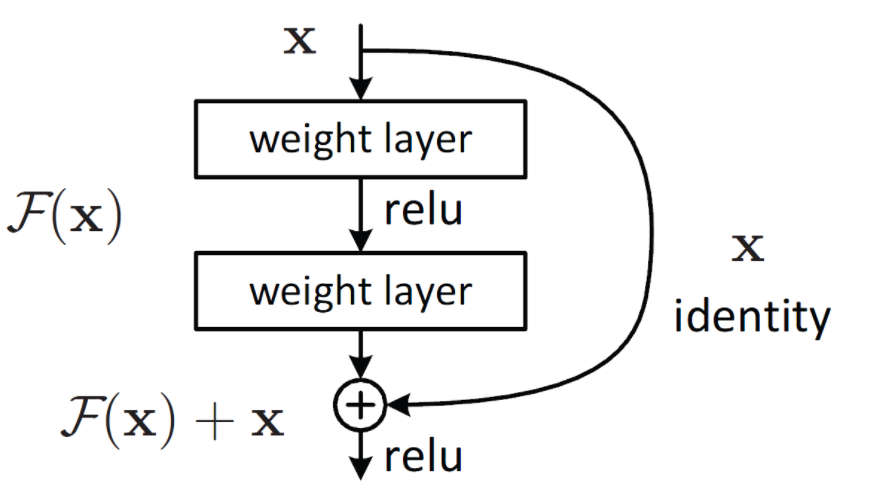

A arquitetura básica de uma ResNet qualquer é descrita na Figura 4. É aplicada na entrada um bloco de preenchimento zero de (3,3). No Estágio 1, a Convolução 2D tem 64 filtros de forma (7,7) e usa uma passada de (2,2). O BatchNorm é aplicado ao eixo dos canais da entrada. O MaxPooling usa uma janela (3,3) e uma passada (2,2). No Estágio 2, o bloqueio convolucional usa três conjuntos de filtros. Os 2 blocos de identidade usam três conjuntos de filtros. Estágio 3, o bloqueio convolucional usa três conjuntos de filtros. Os 3 blocos de identidade usam três conjuntos de filtros. No Estágio 4, o bloco convolucional usa três conjuntos de filtros de tamanho. Os 5 blocos de identidade usam três conjuntos de filtros. Estágio 5, o bloqueio convolucional usa três conjuntos de filtros. Os 2 blocos de identidade usam três conjuntos de filtros. O Average Pooling (Agrupamento médio) 2D usa uma janela de forma (2,2). O flatten (nivelamento da camada) não possui nenhum hiperparâmetro ou nome. E a camada totalmente conectada (Densa) reduz sua entrada para o número de classes usando uma ativação Softmax.

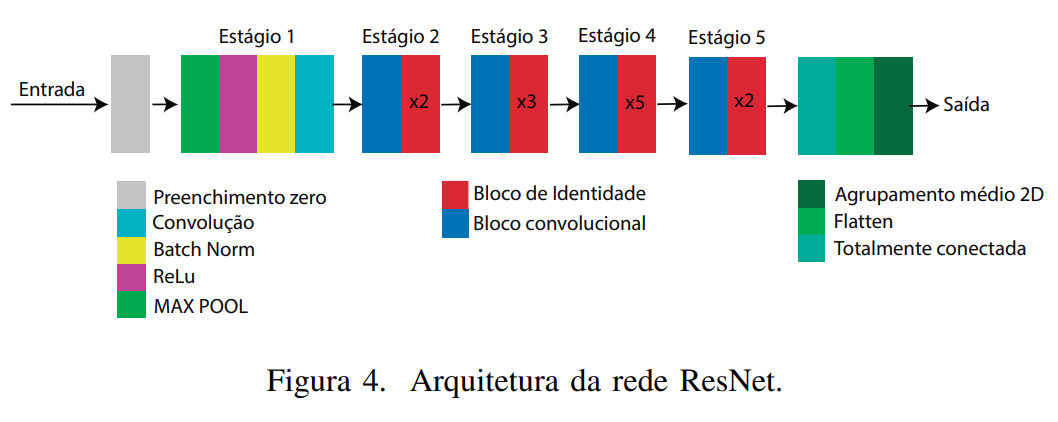

Embora o ResNet seja muito mais profundo do que o VGG16 e o VGG19, o tamanho do modelo é substancialmente menor devido ao uso de pooling médio global em vez de camadas totalmente conectadas - isso reduz o tamanho do modelo para 102 MB para ResNet50.

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outras imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [7]:
## IMPLEMENTE
qtde_classes = 3

In [8]:
#o parâmetro "include_top=False" configura o modelo para não utilizar a camada densa original, pois será substituída pelas novas classes.

conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [9]:
#Removendo a camada densa para que seja adaptada para lidar com apenas 3 classes.
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [11]:
## IMPLEMENTE
qtde_epocas = 25

In [12]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
5/5 [==============================] - 35s 7s/step - loss: 1.7371 - precision_score: 0.3642 - recall_score: 0.3100 - f1_score: 0.3333 - val_loss: 1.2440 - val_precision_score: 0.3130 - val_recall_score: 0.3063 - val_f1_score: 0.3096
Epoch 2/25
5/5 [==============================] - 27s 6s/step - loss: 0.9030 - precision_score: 0.5625 - recall_score: 0.5331 - f1_score: 0.5470 - val_loss: 0.6362 - val_precision_score: 0.7429 - val_recall_score: 0.6750 - val_f1_score: 0.7066
Epoch 3/25
5/5 [==============================] - 26s 6s/step - loss: 0.6730 - precision_score: 0.7658 - recall_score: 0.7160 - f1_score: 0.7399 - val_loss: 0.5210 - val_precision_score: 0.7786 - val_recall_score: 0.7063 - val_f1_score: 0.7402
Epoch 4/25
5/5 [==============================] - 25s 6s/step - loss: 0.5005 - precision_score: 0.8179 - recall_score: 0.7627 - f1_score: 0.7892 - val_loss: 0.5059 - val_precision_score: 0.7919 - val_recall_score: 0.7437 - val_f1_score: 0.7667
Epoch 5/25
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

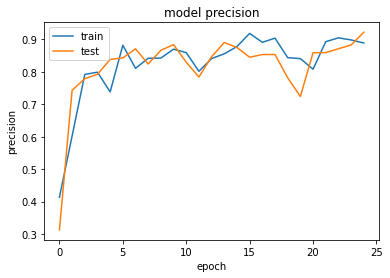

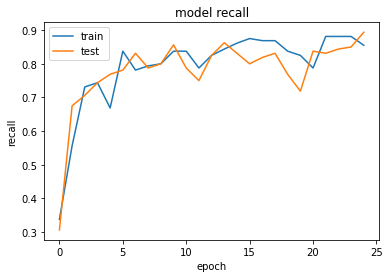

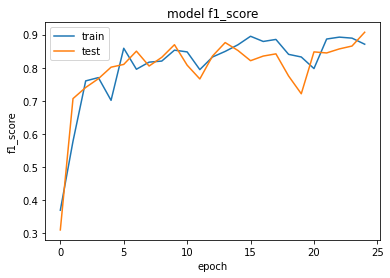

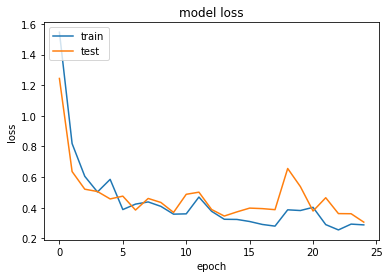

In [13]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Como podemos ver nos gráficos, os indicadores de performance demonstraram boa evolução. Como a ResNet50 foi treinada com muitas classes e imagens diferentes, se adaptou bem ao nosso problema, chegando a precisão acima dos 92% e queda expressiva no gráfico de perda.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Os valores são:

- val_precision_score (Precisão): 92%
- val_recall_score (Sensibilidade): 89% 
- val_f1_score (pontuação): 90%

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: A VGG-16 é um modelo de rede neura convolucional proposto por K. Simonyan e A. Zisserman em Oxford. Foi um dos famosos modelos submetidos ao ILSVRC-2014. Ele fez melhoria sobre a AlexNet substituindo grandes filtros convolucionais (11 e 5 na primeira e segunda camadas convolucionais, respectivamente) por múltiplos filtros de tamanho 3 × 3 um após o outro. 

A arquitetura da VGG-16 é mostrada na figura abaixo. 

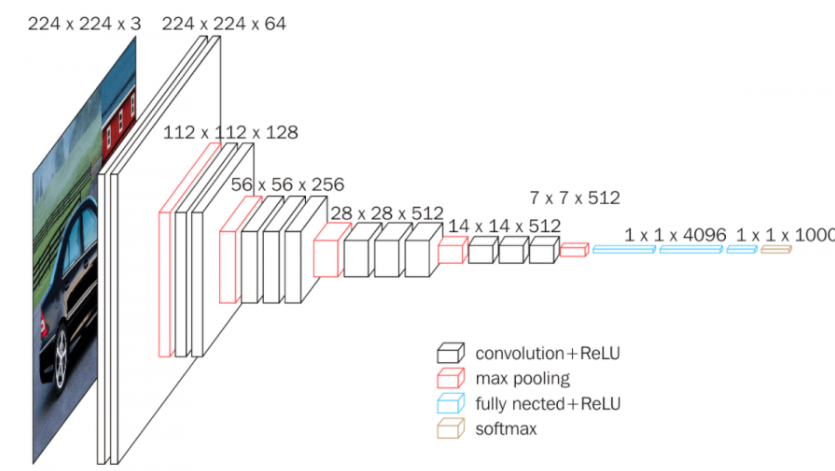

A entrada para a primeira camada de convolução tem o tamanho padrão de 224 x 224, aceitando outros tamanhos. A imagem é passada através de uma pilha de camadas convolucionais, onde os filtros foram usados com um campo receptivo muito pequeno de 3 × 3. O agrupamento espacial é realizado por cinco camadas considerando uma função de máximo. Esse agrupamento é executado em uma janela de 2 × 2 pixels. Três camadas totalmente conectadas (FC) seguem uma pilha de camadas convolucionais (que tem uma profundidade diferente em diferentes arquiteturas): as duas primeiras têm 4096 neurônios cada, a terceira executa a classificação. A camada final é aplica a função Softmax. Todas as camadas ocultas estão equipadas com a não linearidade do tipo ReLU.

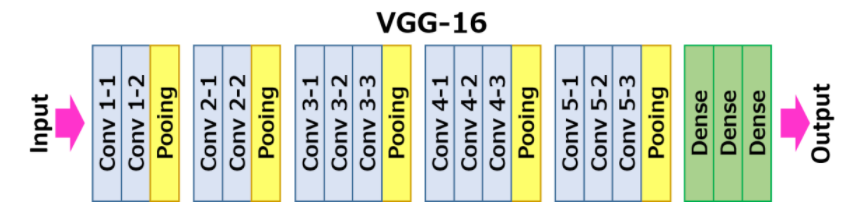


Devido à sua profundidade e número de camadas totalmente conectadas, o VGG tem mais de 533 MB para VGG16 e 574 MB para VGG19. Isso torna a implantação do VGG uma tarefa cansativa.
Ainda usamos o VGG em muitos problemas de classificação de imagens de aprendizado profundo; no entanto, arquiteturas de rede menores são frequentemente mais desejáveis (como SqueezeNet, GoogLeNet, etc.). Deve-se usar para problemas realmente complexos de solução.

In [14]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [15]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [16]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [17]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/25
5/5 [==============================] - 61s 14s/step - loss: 3.5591 - precision_score: 0.3119 - recall_score: 0.2983 - f1_score: 0.3049 - val_loss: 2.0261 - val_precision_score: 0.5613 - val_recall_score: 0.5375 - val_f1_score: 0.5491
Epoch 2/25
5/5 [==============================] - 64s 14s/step - loss: 1.5616 - precision_score: 0.6111 - recall_score: 0.5953 - f1_score: 0.6031 - val_loss: 1.2618 - val_precision_score: 0.6389 - val_recall_score: 0.6313 - val_f1_score: 0.6350
Epoch 3/25
5/5 [==============================] - 61s 14s/step - loss: 0.9487 - precision_score: 0.6968 - recall_score: 0.6898 - f1_score: 0.6932 - val_loss: 0.8875 - val_precision_score: 0.6780 - val_recall_score: 0.6687 - val_f1_score: 0.6733
Epoch 4/25
5/5 [==============================] - 61s 14s/step - loss: 0.9877 - precision_score: 0.6909 - recall_score: 0.6896 - f1_score: 0.6902 - val_loss: 1.1164 - val_precision_score: 0.6986 - val_recall_score: 0.6938 - val_f1_score: 0.6961
Epoch 5/25
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

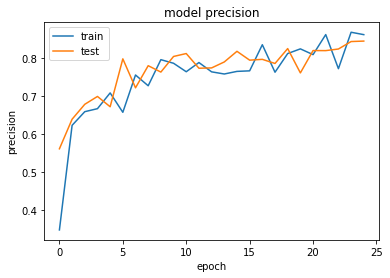

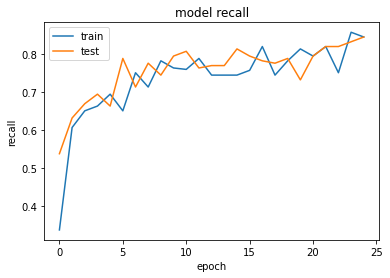

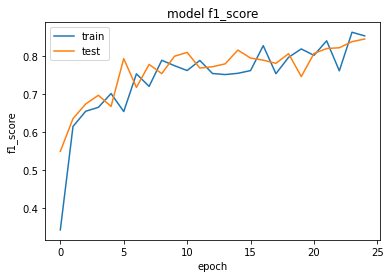

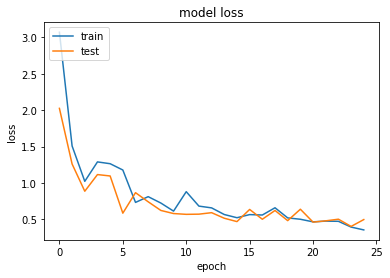

In [18]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Assim como no ResNet50, os gráficos mostraram para o VGG16 bons resultados. Precisão de 84% e queda no gráfico de perda.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

Os valores são:

- val_precision_score (Precisão): 84%
- val_recall_score (Sensibilidade): 84% 
- val_f1_score (pontuação): 84%

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

A arquitetura VGG19 tem o mesmo conceito da VGG16, porém são acrescentadas novas camadas, conforme tabela abaixo:

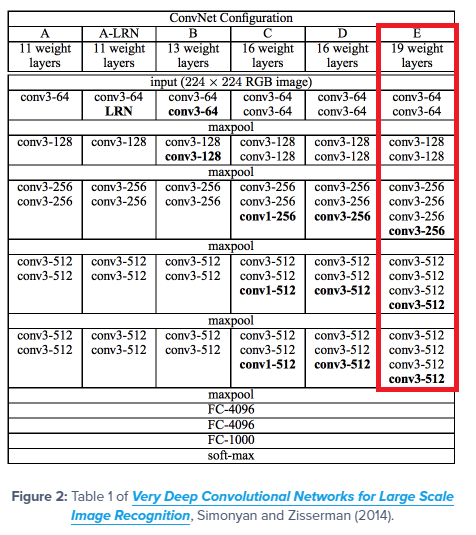

In [19]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [20]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [21]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [22]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/25
5/5 [==============================] - 82s 18s/step - loss: 3.1608 - precision_score: 0.3760 - recall_score: 0.3713 - f1_score: 0.3736 - val_loss: 0.8094 - val_precision_score: 0.6982 - val_recall_score: 0.6812 - val_f1_score: 0.6895
Epoch 2/25
5/5 [==============================] - 77s 17s/step - loss: 1.4791 - precision_score: 0.5688 - recall_score: 0.5605 - f1_score: 0.5646 - val_loss: 1.0138 - val_precision_score: 0.6733 - val_recall_score: 0.6562 - val_f1_score: 0.6646
Epoch 3/25
5/5 [==============================] - 73s 16s/step - loss: 0.8065 - precision_score: 0.7427 - recall_score: 0.7186 - f1_score: 0.7303 - val_loss: 0.6504 - val_precision_score: 0.7522 - val_recall_score: 0.7375 - val_f1_score: 0.7447
Epoch 4/25
5/5 [==============================] - 74s 16s/step - loss: 0.8893 - precision_score: 0.7770 - recall_score: 0.7381 - f1_score: 0.7568 - val_loss: 0.8391 - val_precision_score: 0.7403 - val_recall_score: 0.7312 - val_f1_score: 0.7357
Epoch 5/25
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

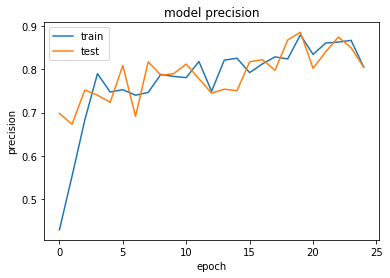

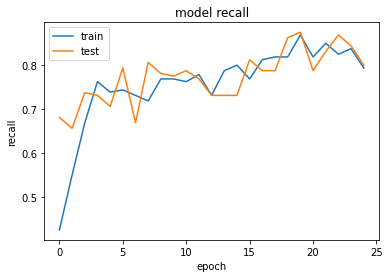

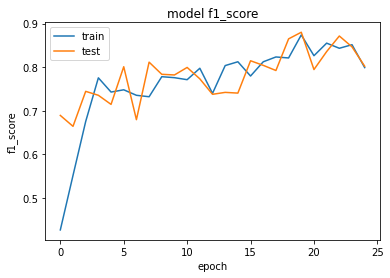

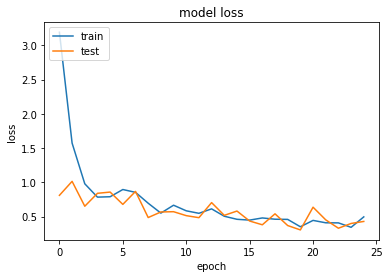

In [23]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: No caso de VGG19, também tivemos bons resultados com esse modelo. Os gráficos de precisão, sensibilidade e f1 chegaram a marca acima dos 80%, com queda na perda.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Os valores são:

- val_precision_score (Precisão): 80%
- val_recall_score (Sensibilidade): 80% 
- val_f1_score (pontuação): 80%

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo         | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------------|----------|---------------|----------|
| ResNet50       | 92 %     | 89 %          | 90 %     |
| VGG16          | 84 %     | 84 %          | 84 %     |
| VGG19          | 80 %     | 80 %          | 80 %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Resposta**:

Com base na tabelas acima, o modelo que apresentou melhor resultado é o ResNet50.

Todos foram treinados usando o base do ImageNet com milhões de imagens e diferentes classes. Portanto o problema apresentado obteve bons resultado por todos os modelos.

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

## Inception V3

A micro-arquitetura Inception foi introduzida por Szegedy no artigo de 2014, e pretende atuar como um extrator de features de varios níveis calculando varias convolucões no mesmo modulo. A versão original desta rede era chamada de GoogLeNet. A arquitetura InceptionV3 está incluída no Keras vem da publicacão Rethinking the Inception Architecture for Computer Vision de 2015. A dimensao da Inception V3 e inferior VGG e ResNet, ficando com 96MB de espaço.

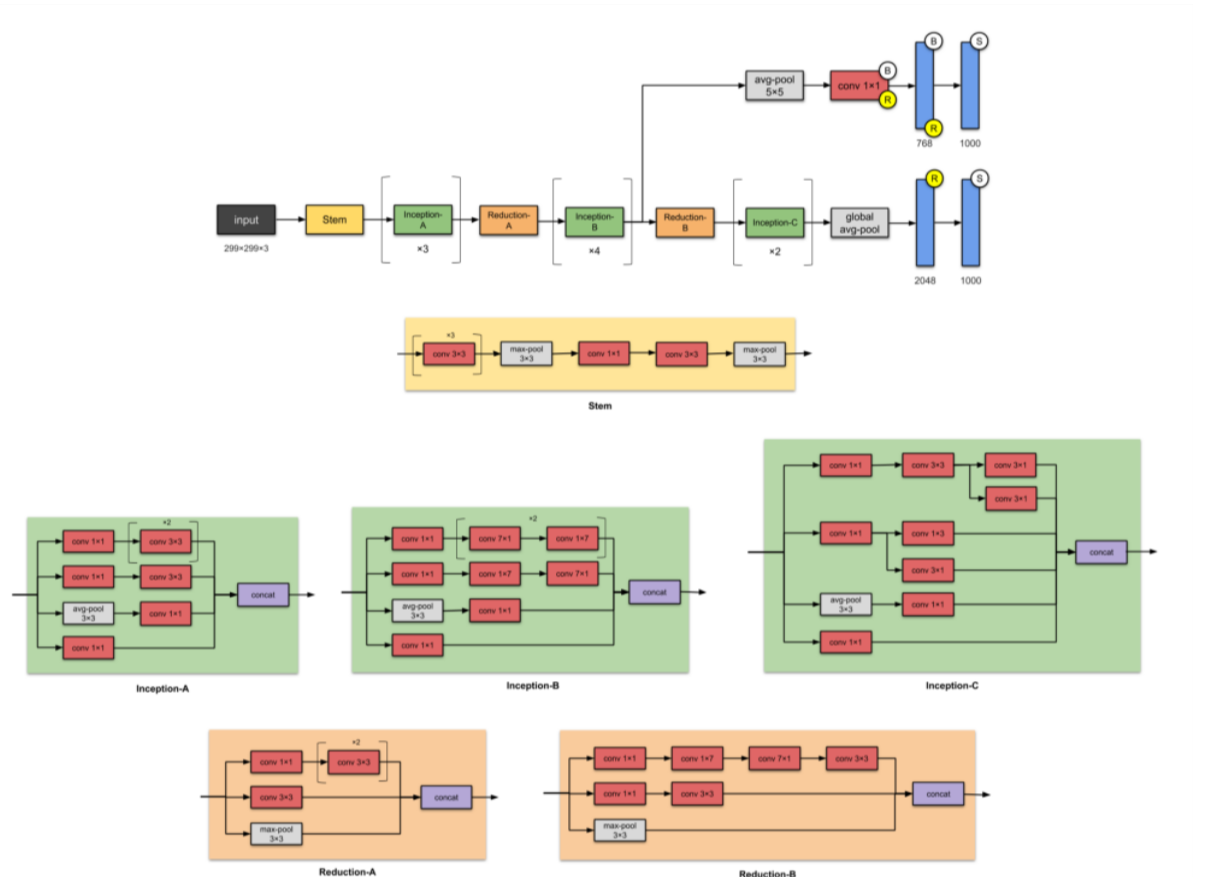

In [24]:
#IMPLEMENTE

#Será utilizado o InceptionV3

from keras.applications import InceptionV3

conv_base = InceptionV3(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [25]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [26]:
#preprocessamento para 299x299, padrão do modelo utilizado.

train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(299,299),
    subset="training")

Found 2100 images belonging to 3 classes.


In [27]:
val_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(299,299),
    subset="validation")

Found 900 images belonging to 3 classes.


In [28]:
train_generator.class_indices, val_generator.class_indices

({'bacteria': 0, 'controle': 1, 'viral': 2},
 {'bacteria': 0, 'controle': 1, 'viral': 2})

In [29]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [30]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/25
5/5 [==============================] - 34s 6s/step - loss: 43.6109 - precision_score: 0.2812 - recall_score: 0.2812 - f1_score: 0.2812 - val_loss: 14.4672 - val_precision_score: 0.3750 - val_recall_score: 0.3750 - val_f1_score: 0.3750
Epoch 2/25
5/5 [==============================] - 27s 6s/step - loss: 10.1663 - precision_score: 0.4028 - recall_score: 0.4028 - f1_score: 0.4028 - val_loss: 3.3190 - val_precision_score: 0.5063 - val_recall_score: 0.5063 - val_f1_score: 0.5062
Epoch 3/25
5/5 [==============================] - 30s 6s/step - loss: 5.7435 - precision_score: 0.4161 - recall_score: 0.4136 - f1_score: 0.4149 - val_loss: 3.9506 - val_precision_score: 0.6036 - val_recall_score: 0.6000 - val_f1_score: 0.6018
Epoch 4/25
5/5 [==============================] - 28s 6s/step - loss: 3.8995 - precision_score: 0.6627 - recall_score: 0.6604 - f1_score: 0.6615 - val_loss: 3.6447 - val_precision_score: 0.6625 - val_recall_score: 0.6625 - val_f1_score: 0.6625
Epoch 5/25
5/5 [=====

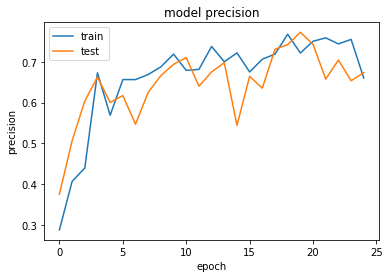

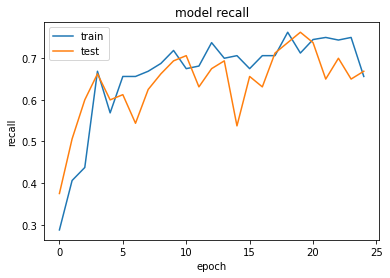

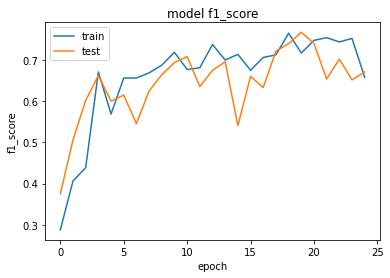

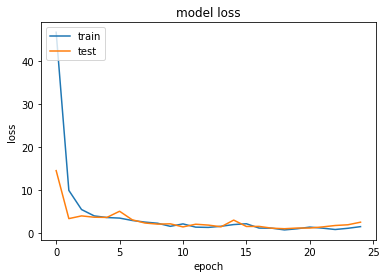

In [31]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**:

| Modelo         | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------------|----------|---------------|----------|
| ResNet50       | 92 %     | 89 %          | 90 %     |
| VGG16          | 84 %     | 84 %          | 84 %     |
| VGG19          | 80 %     | 80 %          | 80 %     |
| InceptionV3    | 67 %     | 66 %          | 67 %     |

A abordagem utilizando InceptionV3 mostrou resultados bem inferiores ao uso dos outros modelos.